In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### ขั้นตอนการรับค่าจาก data
- ต้องทำการแก้ path ให้ตรงกับไฟล์ข้อมูลของแต่ละเครื่อง เพราะไม่ได้ เพราะ ทำการ gitignore data file *.csv

In [2]:
# Load data based on user input size
n = int(input("Enter the size of your data : "))
if n == 20:
    folds = [2, 3, 5, 10]
    print("results of data 20")
    data = pd.read_csv('../Data/HeightWeight20.csv')  #
elif n == 100:
    folds = [2, 3, 5, 10, 20]
    print("results of data 100")
    data = pd.read_csv('../Data/HeightWeight100.csv')  #
elif n == 10000:
    folds = [2, 3, 5, 10, 20]
    print("results of data 10000")
    data = pd.read_csv('../Data/HeightWeight.csv')  #
else:
    print("Enter the correct data size")

X = data[['Height']].values
y = data['Weight'].values

data

results of data 20


,Height,Weight
0,187.571423,109.720985
1,174.706036,73.622732
2,188.239668,96.497550
3,182.196685,99.809504
4,177.499762,93.598619
5,170.822660,69.042216
6,174.714106,83.428219
7,173.605229,76.190352
8,170.228132,79.800187
9,161.179495,70.941642


### ฟังก์ชันสำหรับคำนวณความเที่ยงตรง (Precision) และความแม่นยำ (Accuracy) 
-  ได้เพิ่ม r2 ซึ่งเป็นค่าที่บอก ว่าตัวแปร X ทั้งหมดสามารถอธิบายตัวแปร Y ได้เท่าไร 

      $R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$

In [3]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

### ฟังก์ชัน cross_validation
 - ทำการ cross-validation กับข้อมูลที่ให้มา โดยใช้การแบ่งข้อมูลเป็น kส่วน และทำการคำนวณค่า RMSE และ R2 ในแต่ละส่วน

In [4]:
def cross_validation(X, y, k=10, random_state=42):
    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    
    rmse_values = []
    r2_values = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        rmse, r2 = evaluate_model(y_test, y_pred)
        rmse_values.append(rmse)
        r2_values.append(r2)
    
    return np.array(rmse_values), np.array(r2_values)

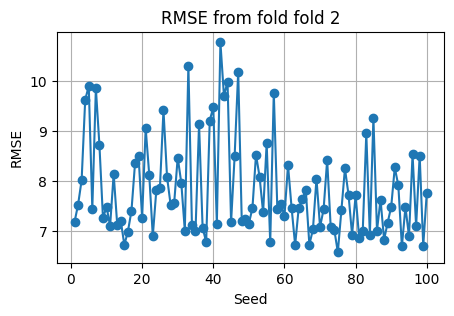

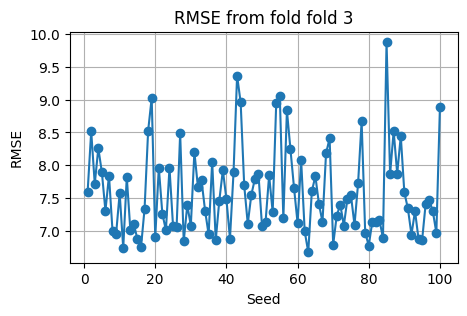

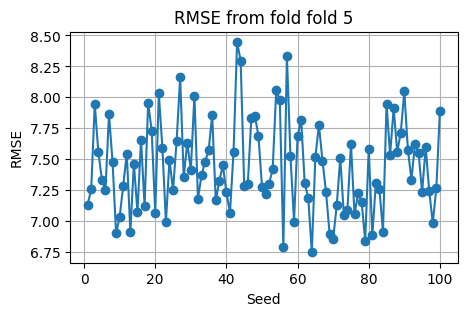

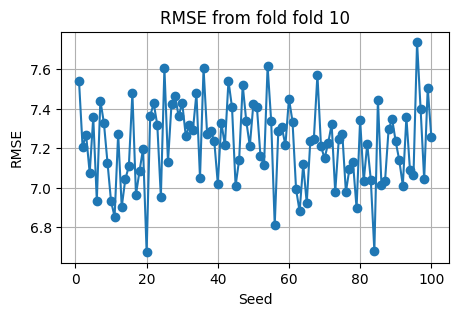

In [5]:
# ทดลอง seed และ fold ตามนี้
n_seed = 100
seeds = range(1, n_seed+1)

results = {}

# วนลูปทดสอบทุก seed และ fold
for fold in folds:
    fold_results = {}
    for seed in seeds:
        rmse_cv, r2_cv = cross_validation(X, y, k=fold, random_state=seed)
        fold_results[f"seed {seed}"] = (rmse_cv, r2_cv)
    results[f"fold {fold}"] = fold_results


# Plot RMSE results
for fold, fold_result in results.items():
    rmse_list = []
    for seed, (rmse, r2) in fold_result.items():
        rmse_list.append(np.mean(rmse))
    
    plt.figure(figsize=(5, 3))
    plt.plot(seeds, rmse_list, marker='o')
    plt.title(f'RMSE from fold {fold}')
    plt.xlabel('Seed')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.show()

### คำนวณและแสดงผลค่าเฉลี่ย (average) และส่วนเบี่ยงเบนมาตรฐาน (standard deviation) 
- หา $\sqrt{\frac{\sum_{i=0}^{N - 1} (y_i - \hat{y}_i)^2}{N}}$  และค่า  $R^2$ จากผลการทดสอบในแต่ละ fold มาแยกใส่ใน list
- นำ list ที่ได้มาหาค่า แล้ว print ตาม fold นั้น แล้วจึง วน loop จนครบทุก fold

In [6]:
# แสดงผล และคำนวณ sd , average
for fold, fold_result in results.items():
    print(f"{fold}:")  
    rmse_list = []
    r2_list = []
    for seed, (rmse, r2) in fold_result.items():
        # print(f"  {seed} - RMSE: {float(np.mean(rmse)):.2f}\t R2: {float(np.mean(r2)):.2f}")
        rmse_list.append(rmse)
        r2_list.append(r2)
    
    # หาค่า standard deviation and average จาก list
    rmse_mean = np.mean(rmse_list)
    rmse_sd = np.std(rmse_list)
    r2_mean = np.mean(r2_list)
    r2_sd = np.std(r2_list)

    
    print(f"  Average RMSE: {float(rmse_mean):.4f}\t SD RMSE: {float(rmse_sd):.4f}")
    print(f"  Average R2: {float(r2_mean):.4f}\t SD R2: {float(r2_sd):.4f}")
    print()

fold 2:
  Average RMSE: 7.8372	 SD RMSE: 1.2161
  Average R2: 0.7679	 SD R2: 0.1097

fold 3:
  Average RMSE: 7.5898	 SD RMSE: 1.2785
  Average R2: 0.7371	 SD R2: 0.2137

fold 5:
  Average RMSE: 7.4426	 SD RMSE: 1.4657
  Average R2: 0.5230	 SD R2: 0.9556

fold 10:
  Average RMSE: 7.2201	 SD RMSE: 2.0350
  Average R2: -8.2775	 SD R2: 47.1863

